# 딥러닝

In [47]:
# !pip install tensorflow

In [48]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

df = pd.read_csv('ms001.csv', encoding='euc-kr')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9682 non-null   object 
 1   최종가중치       9682 non-null   float64
 2   학교ID        9682 non-null   object 
 3   도시규모        9682 non-null   object 
 4   도시규모별분석용    9682 non-null   object 
 5   학년도         9682 non-null   int64  
 6   광역시도        9682 non-null   object 
 7   시도별         9682 non-null   object 
 8   학교급별        9682 non-null   int64  
 9   학교명         9682 non-null   object 
 10  공학여부        9682 non-null   object 
 11  학년          9682 non-null   int64  
 12  반           9682 non-null   int64  
 13  성별          9682 non-null   object 
 14  건강검진일       9682 non-null   int64  
 15  키           9682 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,...,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,...,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,...,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,...,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,Aa176여60123,86.530238,Aa17,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,경기초등학교,...,150.8,37.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9678,Ac073여30109,82.873000,Ac07,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,성심여자고등학교,...,156.7,79.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9679,Aa045여50122,135.488328,Aa04,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울길원초등학교,...,148.5,40.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9680,Aa174여40128,86.554674,Aa17,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,경기초등학교,...,138.4,41.4,81.0,160.0,24.0,15.0,NaN,NaN,90.0,50.0


In [49]:
df.isna().sum()

ID               0
최종가중치            0
학교ID             0
도시규모             0
도시규모별분석용         0
학년도              0
광역시도             0
시도별              0
학교급별             0
학교명              0
공학여부             0
학년               0
반                0
성별               0
건강검진일            0
키                0
몸무게              0
혈당식전mgdl      9344
총콜레스테롤mgdl    9343
ASTUL         9346
ALTUL         9345
혈색소gdl        9104
간염검사          8851
수축기           6657
이완기           6657
dtype: int64

In [50]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9682 non-null   object 
 1   최종가중치     9682 non-null   float64
 2   학교ID      9682 non-null   object 
 3   도시규모      9682 non-null   object 
 4   도시규모별분석용  9682 non-null   object 
 5   학년도       9682 non-null   int64  
 6   광역시도      9682 non-null   object 
 7   시도별       9682 non-null   object 
 8   학교급별      9682 non-null   int64  
 9   학교명       9682 non-null   object 
 10  공학여부      9682 non-null   object 
 11  학년        9682 non-null   int64  
 12  반         9682 non-null   int64  
 13  성별        9682 non-null   object 
 14  건강검진일     9682 non-null   int64  
 15  키         9682 non-null   float64
 16  몸무게       9682 non-null   float64
dtypes: float64(3), int64(5), object(9)
memory usage: 1.3+ MB


In [51]:
df2 = df.copy()

In [52]:
scaler = MinMaxScaler()
df2[['키','몸무게']] = scaler.fit_transform(df2[['키','몸무게']])
df2['성별'] = df2['성별'].map({'남':0,'여':1})
df2[['키','몸무게','성별']]
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [53]:
df2['학교'] = np.where(df2['학교명'].str.endswith('초등학교'),0, np.where(df2['학교명'].str.endswith('중학교'),1,2))
df2.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,학교
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,0,20150511,0.744509,0.388502,2
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,0,20150415,0.369942,0.249129,0
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,0,20150520,0.824277,0.548780,2
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,0,20150421,0.338728,0.115854,0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,0,20150423,0.545665,0.327526,1


In [54]:
y = df2['학교']
X = df2[['키','몸무게','성별']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7745, 3) (1937, 3) (7745,) (1937,)


In [63]:
# 모델 객체 생성
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [64]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 학습
EPOCHS = 100
print("***** TRAINING START *****")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), callbacks=[early_stop])
print("***** TRAINING FINISHED *****")

***** TRAINING START *****
Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6208 - loss: 0.9124 - val_accuracy: 0.6887 - val_loss: 0.6833
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7145 - loss: 0.6180 - val_accuracy: 0.7217 - val_loss: 0.5961
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7300 - loss: 0.5807 - val_accuracy: 0.7238 - val_loss: 0.5762
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7339 - loss: 0.5648 - val_accuracy: 0.7274 - val_loss: 0.5646
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: 0.5578 - val_accuracy: 0.7284 - val_loss: 0.5648
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7357 - loss: 0.5516 - val_accuracy: 0.7357 - val_loss: 0.5582
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7349 - loss: 0.5490 - val_accuracy: 0.7331 - val_loss: 0.5548
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.737

In [79]:
# 모델 파일로 저장
joblib.dump(model,'model.pkl')
joblib.dump(history, "history.pkl")

['history.pkl']

In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,735 (10.69 KB)

 Trainable params: 911 (3.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,824 (7.13 KB)

In [71]:
pred = model.predict(X_test)
print(pred)
print(pred.shape)
print(y_test)
print(y_test.shape)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
[[7.3183858e-01 2.6292583e-01 5.2356385e-03]
 [6.1616176e-03 2.6838911e-01 7.2544920e-01]
 [2.7048244e-04 1.6674425e-01 8.3298528e-01]
 ...
 [9.9845755e-01 1.5415187e-03 8.9670215e-07]
 [3.4627535e-03 3.0888104e-01 6.8765616e-01]
 [6.7948271e-04 2.2165430e-01 7.7766615e-01]]
(1937, 3)
3204    1
2094    1
2698    2
6071    0
346     2
       ..
5944    0
1794    2
3595    0
2473    2
1501    2
Name: 학교, Length: 1937, dtype: int64
(1937,)


In [74]:
history.history['val_accuracy']

[0.6886938810348511,
 0.7217346429824829,
 0.7237997055053711,
 0.727413535118103,
 0.7284460663795471,
 0.735673725605011,
 0.7330924272537231,
 0.731027364730835,
 0.731027364730835,
 0.7289623022079468,
 0.732059895992279,
 0.7268972396850586,
 0.731027364730835,
 0.7289623022079468,
 0.7279297709465027,
 0.7284460663795471,
 0.7299948334693909,
 0.731027364730835,
 0.7294785976409912,
 0.7191533446311951,
 0.7232834100723267,
 0.731027364730835,
 0.732059895992279,
 0.7341249585151672,
 0.7289623022079468,
 0.727413535118103,
 0.7268972396850586,
 0.7253484725952148,
 0.7289623022079468,
 0.7268972396850586,
 0.7299948334693909,
 0.7237997055053711,
 0.7263810038566589,
 0.727413535118103,
 0.7305111289024353,
 0.7212184071540833,
 0.7315436005592346,
 0.731027364730835,
 0.731027364730835,
 0.7325761318206787,
 0.7294785976409912,
 0.7336086630821228,
 0.7305111289024353,
 0.732059895992279]

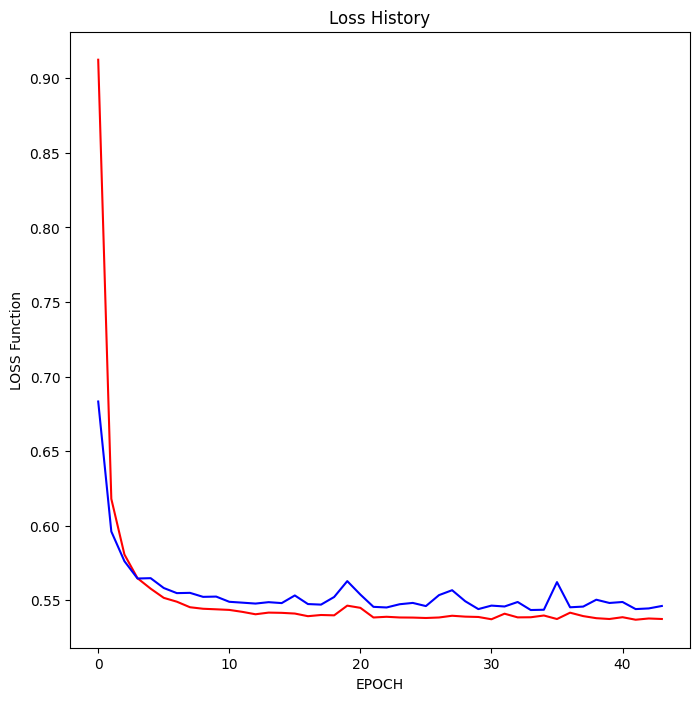

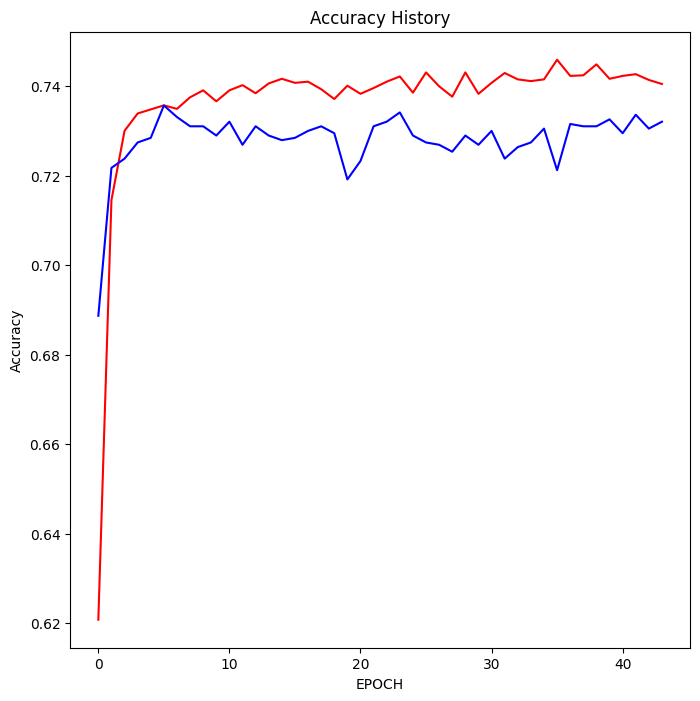

In [75]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [ ]:
school_types = {0: "초", 1: "중", 2: "고"}

# np.argmax : 각 샘플에 대해 가장 높은 확률을 가진 클래스의 인덱스 반환
predicted_classes = np.argmax(pred, axis=1)
predicted_school_types = [school_types[i] for i in predicted_classes]
predicted_school_types

['초',
 '고',
 '고',
 '초',
 '고',
 '고',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '중',
 '초',
 '중',
 '고',
 '고',
 '고',
 '고',
 '고',
 '중',
 '중',
 '초',
 '고',
 '고',
 '초',
 '고',
 '초',
 '고',
 '초',
 '초',
 '고',
 '고',
 '초',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '초',
 '초',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '중',
 '중',
 '중',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '고',
 '초',
 '고',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '고',
 '초',
 '초',
 '초',
 '중',
 '고',
 '고',
 '중',
 '고',
 '고',
 '중',
 '고',
 '중',
 '초',
 '초',
 '고',
 '초',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '중',
 '초',
 '중',
 '초',
 '중',
 '중',
 '초',
 '고',
 '초',
 '초',
 '초',
 '초',
 '초',
 '중',
 '초',
 '고',
 '고',
 '중',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '중',
 '고',
 '초',
 '중',
 '초',
 '초',
 '중',
 '초',
 '초',
 '중',
 '고',
 '고',
 '고',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '초',
 '초',
 '고',
 '초',
 '고',
 '중',
 '중',
 '중',
 '고',
 '고',
 '초',
 '중',
 '중',
 '고',
 '고'